#  1. Importing Libraries for Data Analysis and Visualization

In [1]:
import pandas as pd
import numpy as np
import warnings as warnings        
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

# 2. Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_csv("./assests/DDos.pcap_ISCX.csv")

In [4]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
df.shape

(225745, 79)

# 3.Data Cleaning & preprocessing

In [6]:
df.columns = df.columns.str.strip()


In [6]:
df.isnull().sum().sum()

4

In [7]:
df.duplicated().sum()

2633

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
import numpy as np

# Replace infinity values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [13]:
df.isnull().sum().sum()

52

In [14]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)  # This will drop rows with NaN values

In [15]:
print(df.isin([np.inf, -np.inf]).any().any())  # Should be False
print(df.isna().sum().sum())  # Should be 0

False
0


In [16]:
# Identify columns where 50% or more of the values are zero
zero_percentage = (df == 0).mean() * 100
columns_to_drop = zero_percentage[zero_percentage >= 50].index
df = df.drop(columns=columns_to_drop)


# 4. Data Visualization

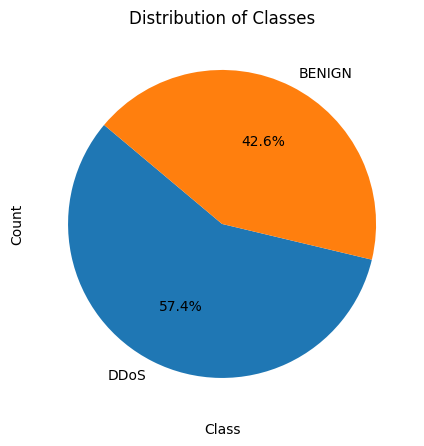

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your target column is named 'Label'
label_counts=df['Label'].value_counts()
plt.figure(figsize=(7, 5))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


<Figure size 1200x600 with 0 Axes>

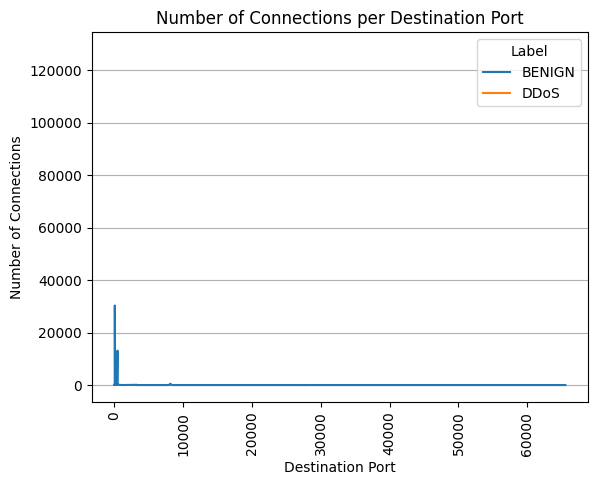

In [18]:
import matplotlib.pyplot as plt

# Group by Label and Destination Port
connection_grouped_by_port = df.groupby(['Label', 'Destination Port']).size().unstack(level=0)

# Plot the number of connections per destination port
plt.figure(figsize=(12, 6))
connection_grouped_by_port.plot()
plt.xlabel('Destination Port')
plt.ylabel('Number of Connections')
plt.title('Number of Connections per Destination Port')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


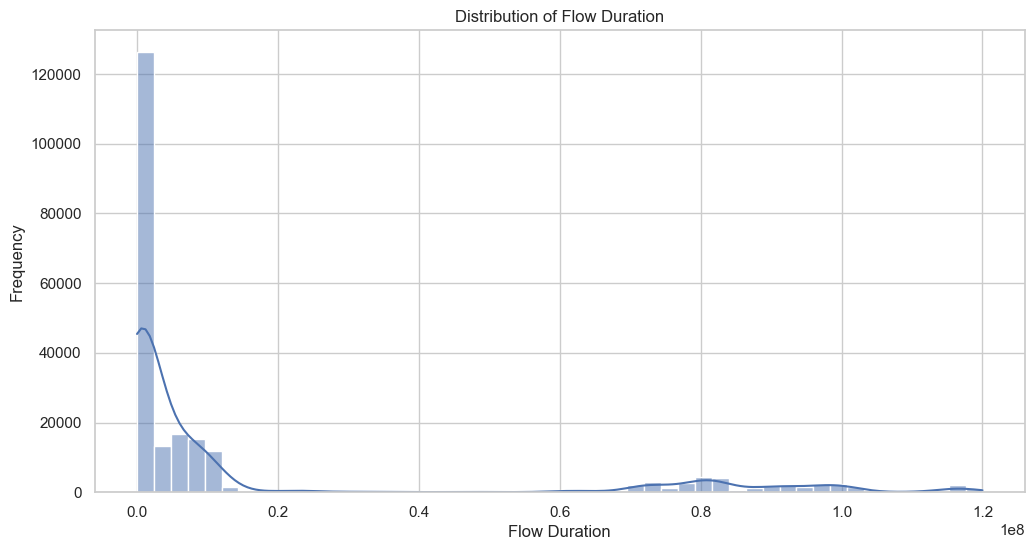

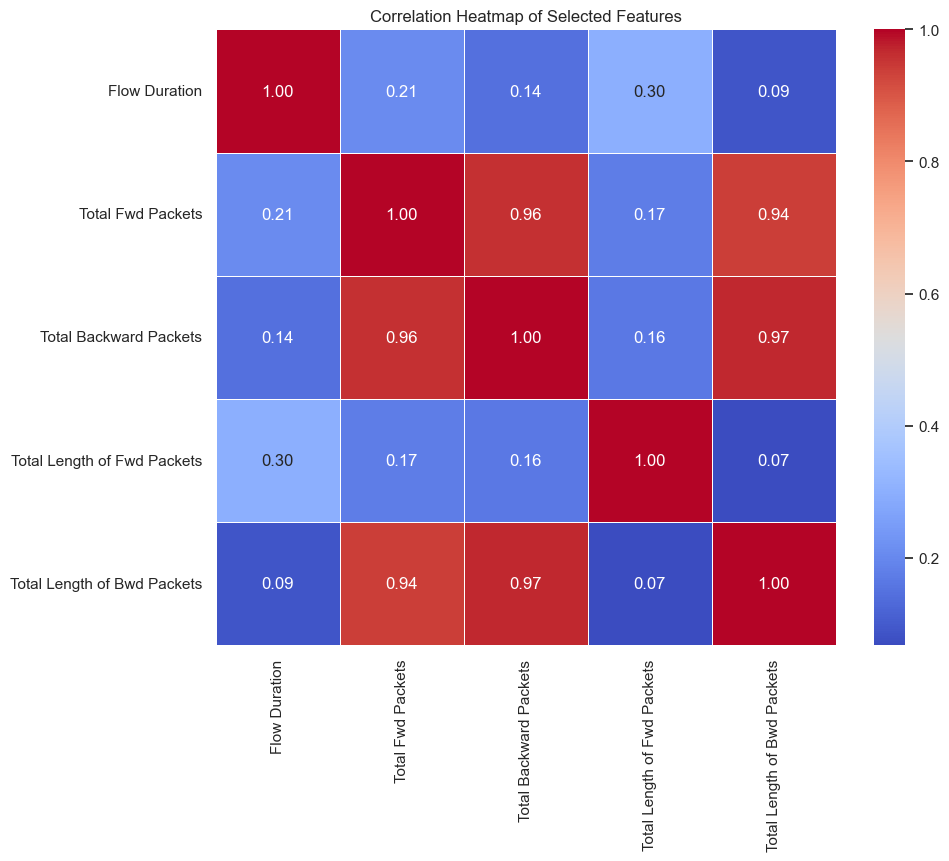

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot 1: Distribution of Flow Duration
plt.figure(figsize=(12, 6))
sns.histplot(df['Flow Duration'], bins=50, kde=True)
plt.title('Distribution of Flow Duration')
plt.xlabel('Flow Duration')
plt.ylabel('Frequency')
plt.show()

# Plot 2: Correlation Heatmap of Selected Features
selected_columns = [
    'Flow Duration', 
    'Total Fwd Packets', 
    'Total Backward Packets', 
    'Total Length of Fwd Packets', 
    'Total Length of Bwd Packets'
]

plt.figure(figsize=(10, 8))
corr_matrix = df[selected_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()


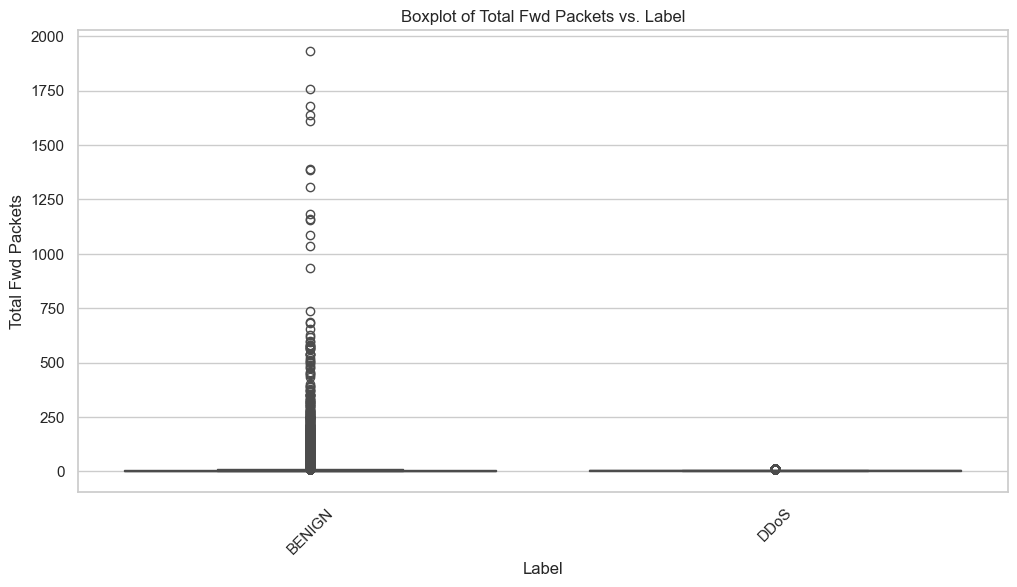

<Figure size 1400x800 with 0 Axes>

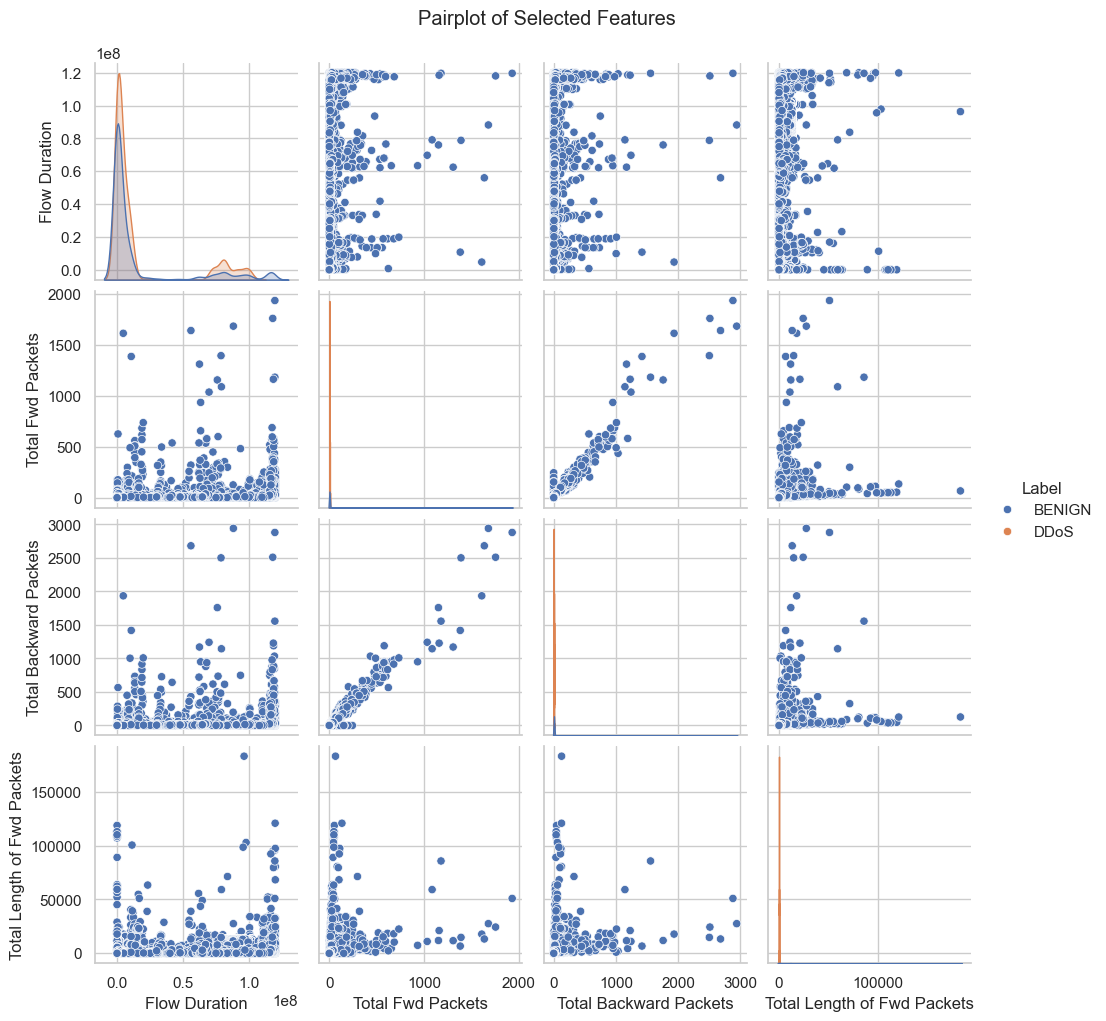

In [20]:
# Plot 3: Boxplot of Total Fwd Packets vs. Label
plt.figure(figsize=(12, 6))
sns.boxplot(x='Label', y='Total Fwd Packets', data=df)
plt.title('Boxplot of Total Fwd Packets vs. Label')
plt.xlabel('Label')
plt.ylabel('Total Fwd Packets')
plt.xticks(rotation=45)
plt.show()

# Plot 4: Pairplot of selected features
selected_columns = [
    'Flow Duration', 
    'Total Fwd Packets', 
    'Total Backward Packets', 
    'Total Length of Fwd Packets', 
    'Label'
]

plt.figure(figsize=(14, 8))
sns.pairplot(df[selected_columns], hue='Label')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


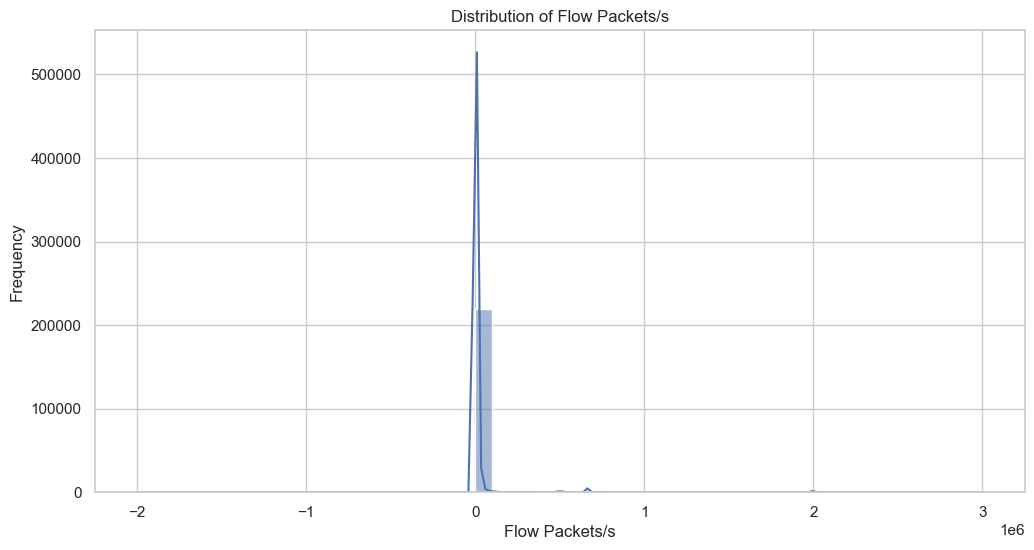

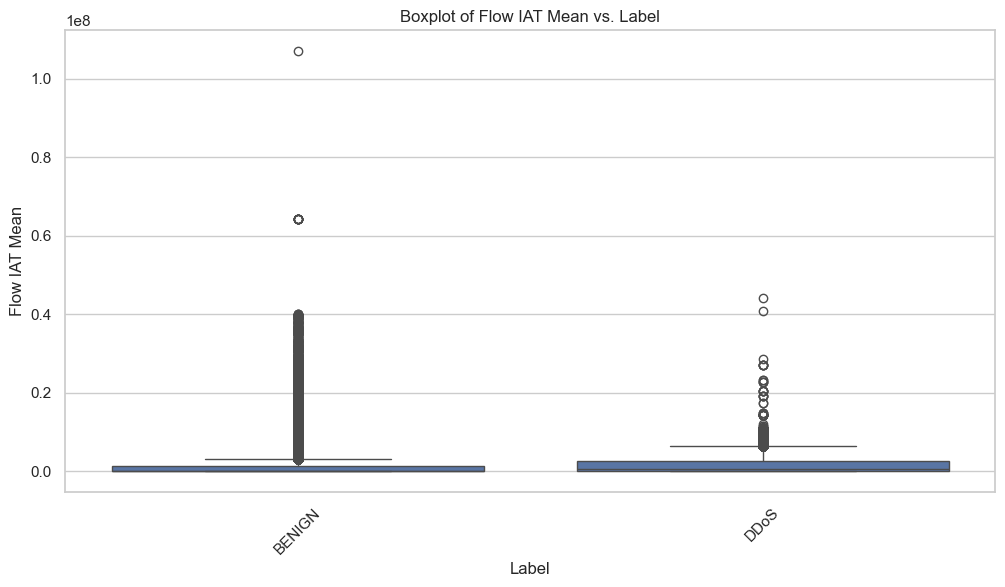

In [21]:
# Plot 5: Distribution of Flow Packets/s
plt.figure(figsize=(12, 6))
sns.histplot(df['Flow Packets/s'], bins=50, kde=True)
plt.title('Distribution of Flow Packets/s')
plt.xlabel('Flow Packets/s')
plt.ylabel('Frequency')
plt.show()

# Plot 6: Boxplot of Flow IAT Mean vs. Label
plt.figure(figsize=(12, 6))
sns.boxplot(x='Label', y='Flow IAT Mean', data=df)
plt.title('Boxplot of Flow IAT Mean vs. Label')
plt.xlabel('Label')
plt.ylabel('Flow IAT Mean')
plt.xticks(rotation=45)
plt.show()


In [22]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder().fit(df['Label'])
df['Label'] = encoder.fit_transform(df['Label'])

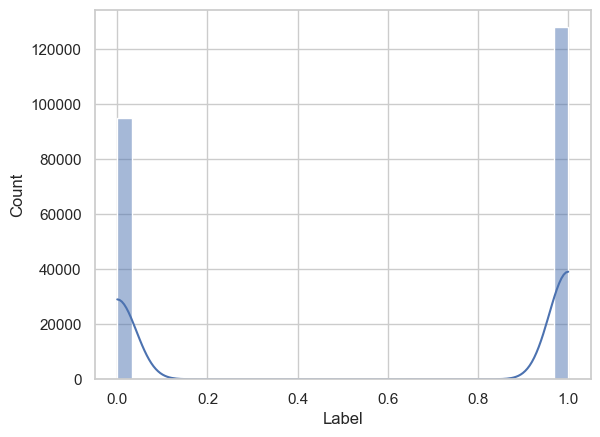

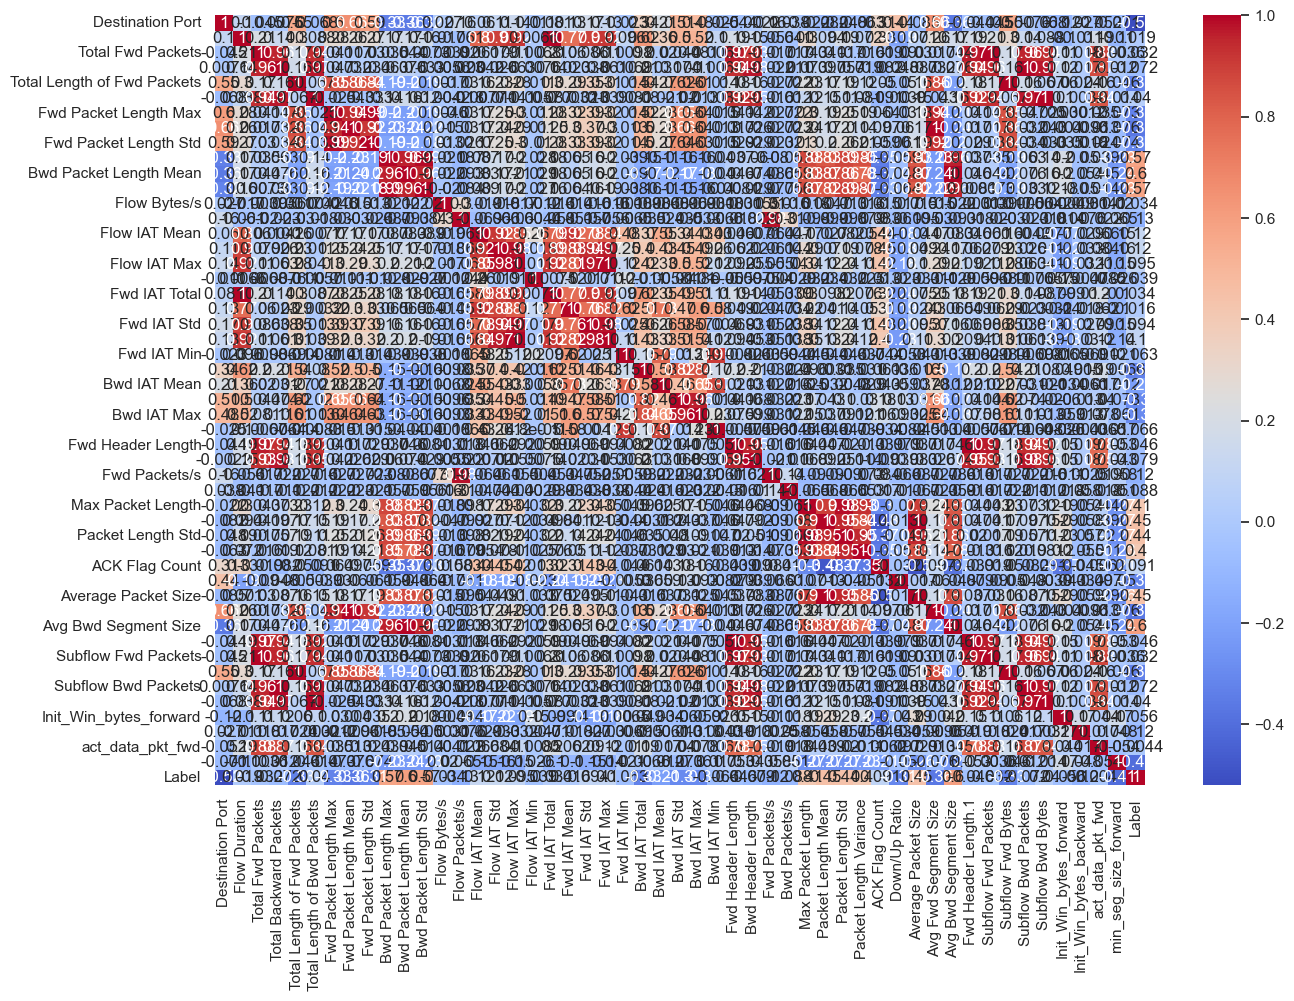

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Distribution of a key feature
sns.histplot(df['Label'], kde=True)
plt.show()

# Example: Correlation heatmap
fig, ax = plt.subplots(figsize=(15, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


# 5. Machine Learning 

In [24]:
y = df['Label'].values
X = df.drop(columns = ['Label'])

In [25]:


# Scaling all the variables to a range of 0 to 1

from sklearn.preprocessing import MinMaxScaler

features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Initialize and train the model

model = LogisticRegression()
result = model.fit(X_train, y_train)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
preds = model.predict(X_test)

# Print the prediction accuracy

print (metrics.accuracy_score(y_test, preds))

# Print the confusion matrix

print (metrics.confusion_matrix(y_test, preds))   
print(metrics.classification_report(y_test, preds))




0.9844452745610758
[[27440  1029]
 [   12 38444]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     28469
           1       0.97      1.00      0.99     38456

    accuracy                           0.98     66925
   macro avg       0.99      0.98      0.98     66925
weighted avg       0.98      0.98      0.98     66925



Accuracy: 0.9995965663312191
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19072
           1       1.00      1.00      1.00     25545

    accuracy                           1.00     44617
   macro avg       1.00      1.00      1.00     44617
weighted avg       1.00      1.00      1.00     44617

[[19072     0]
 [   18 25527]]


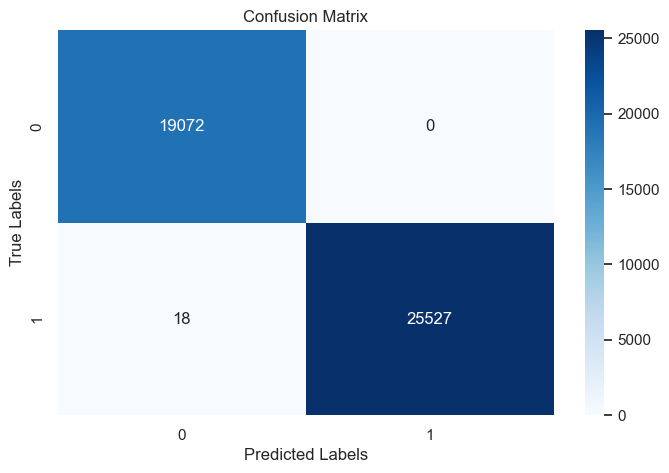

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Initialize and train the model
model_rf = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=50, max_leaf_nodes=30)
model_rf.fit(X_train, y_train)

# Make predictions
preds = model_rf.predict(X_test)

# Calculate accuracy
print("Accuracy:", metrics.accuracy_score(y_test, preds))
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))


# Confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, preds)

# Display the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [30]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))


# Confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, preds)

# Display the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.9994396754600264
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19072
           1       1.00      1.00      1.00     25545

    accuracy                           1.00     44617
   macro avg       1.00      1.00      1.00     44617
weighted avg       1.00      1.00      1.00     44617

[[19056    16]
 [    9 25536]]


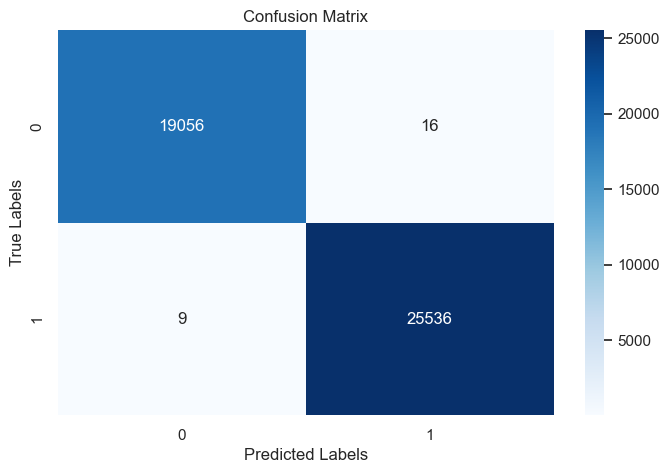

In [31]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = ExtraTreeClassifier()
model.fit(X_train, y_train)
preds  = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

print("Accuracy:", metrics.accuracy_score(y_test, preds))
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

# Confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, preds)

# Display the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.9998206961472085
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19072
           1       1.00      1.00      1.00     25545

    accuracy                           1.00     44617
   macro avg       1.00      1.00      1.00     44617
weighted avg       1.00      1.00      1.00     44617

[[19070     2]
 [    6 25539]]


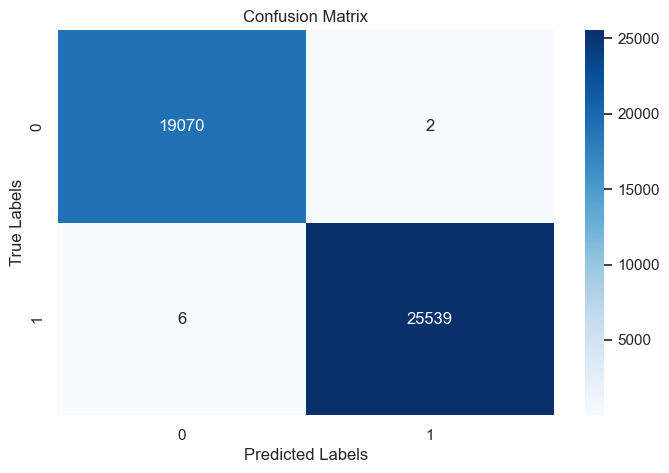

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

print("Accuracy:", metrics.accuracy_score(y_test, preds))
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

# Confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, preds)

# Display the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9999327610552031
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19072
           1       1.00      1.00      1.00     25545

    accuracy                           1.00     44617
   macro avg       1.00      1.00      1.00     44617
weighted avg       1.00      1.00      1.00     44617

[[19070     2]
 [    1 25544]]


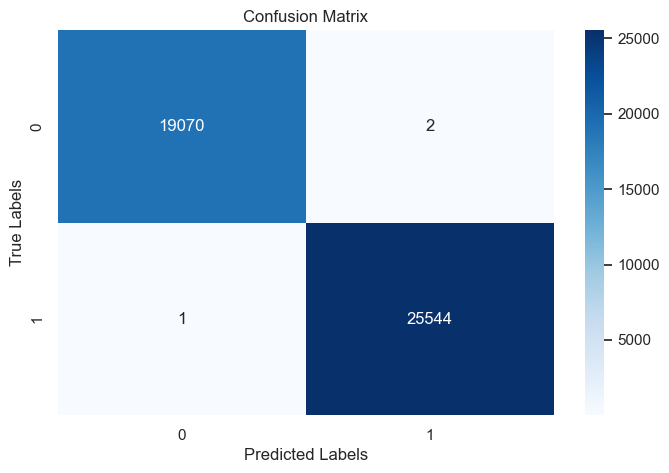

In [33]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

print("Accuracy:", metrics.accuracy_score(y_test, preds))
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

# Confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, preds)

# Display the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.9999551740368021
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19072
           1       1.00      1.00      1.00     25545

    accuracy                           1.00     44617
   macro avg       1.00      1.00      1.00     44617
weighted avg       1.00      1.00      1.00     44617

[[19071     1]
 [    1 25544]]


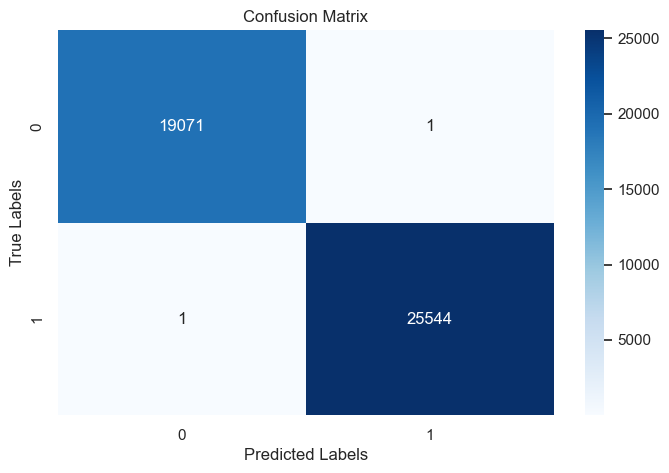

In [34]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

print("Accuracy:", metrics.accuracy_score(y_test, preds))
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

# Confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, preds)

# Display the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [35]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Extra Tree': ExtraTreeClassifier(),
    'SVC': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
    'Logistic Regression': LogisticRegression()
}

accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, preds)

# Print accuracies to verify
for model, acc in accuracies.items():
    print(f"{model}: {acc:.4f}")


Random Forest: 0.9999
Decision Tree: 0.9998
Extra Tree: 0.9997
SVC: 0.9885
AdaBoost: 0.9999
XGBoost: 1.0000
Logistic Regression: 0.9847


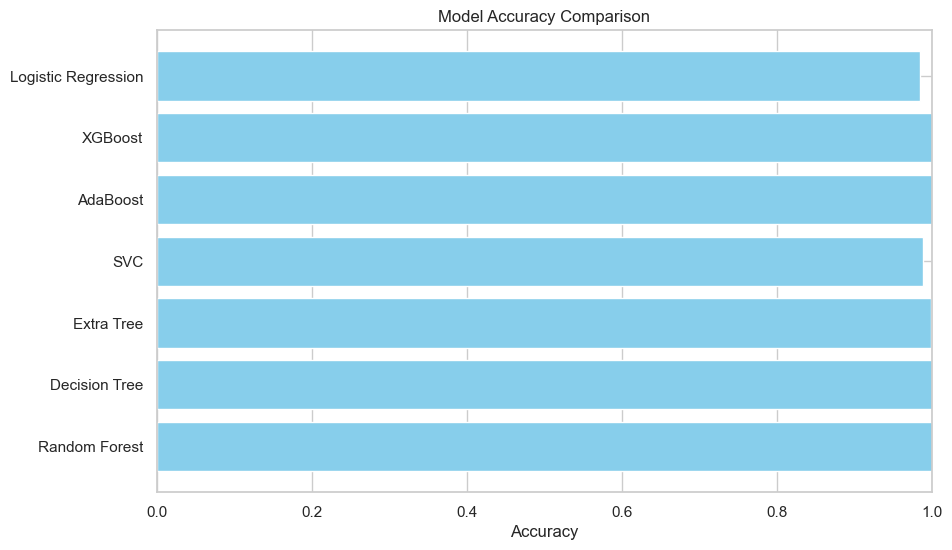

In [36]:
import matplotlib.pyplot as plt

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)  # Assuming accuracy is between 0 and 1
plt.show()


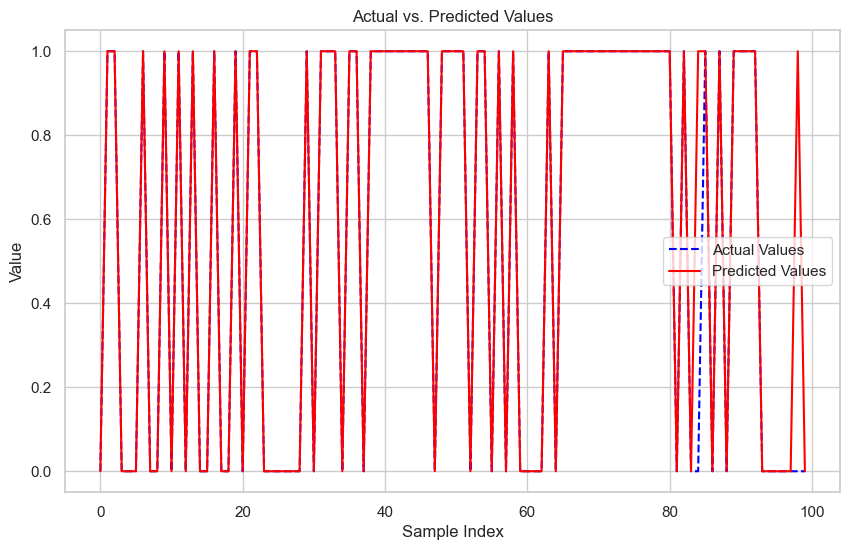

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot the first 100 values for clarity
plt.plot(y_test[:100], label='Actual Values', color='blue', linestyle='dashed')
plt.plot(preds[:100], label='Predicted Values', color='red', linestyle='solid')

plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()
